## Multiple Linear Regression

Multiple regression is to learn more about the relationship between several independent variables and a dependent variable.

Now you know how to build a model with one X (feature variable) and Y (response variable). But what if you have three feature variables, or may be 10 or 100? Building a separate model for each of them, combining them, and then understanding them will be a very difficult and next to impossible task. By using multiple linear regression, you can build models between a response variable and many feature variables.

Let's see how to do that.

<img src="multiple_reg.png">

### Step_1 : Importing and Understanding Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
advertising = pd.read_csv("advertising.csv")
advertising.head()

TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9

In [3]:
advertising.tail()

TV  Radio  Newspaper  Sales
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1    9.7
197  177.0    9.3        6.4   12.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   13.4

In [4]:
advertising.shape

(200, 4)

### Step_2: Visualising Data

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

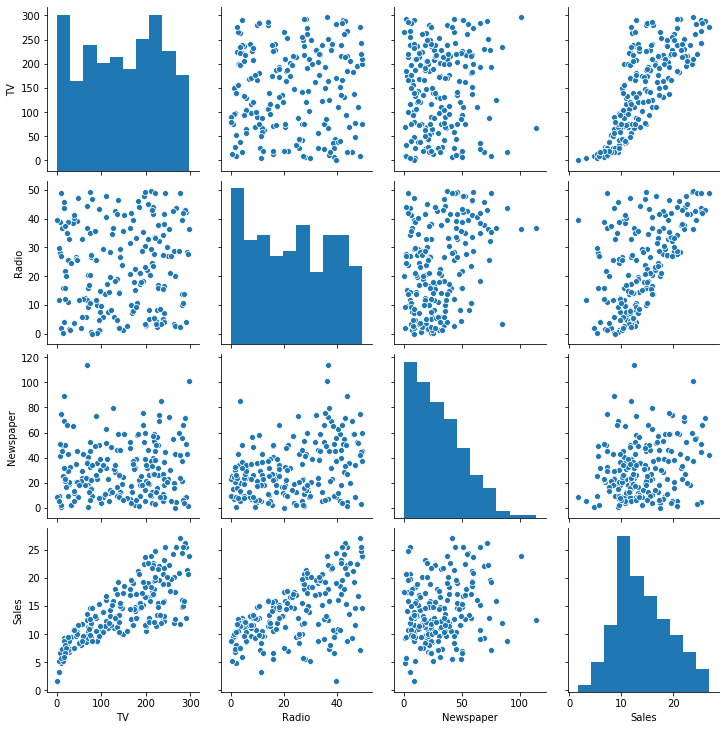

In [7]:
sns.pairplot(advertising)

- Check relationship between two columns

In [8]:
advertising.corr()

TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.782224
Radio      0.054809  1.000000   0.354104  0.576223
Newspaper  0.056648  0.354104   1.000000  0.228299
Sales      0.782224  0.576223   0.228299  1.000000

### Step_3: Splitting the Data for Training and Testing

In [9]:
# feature vectors /inputs 
X = advertising[["TV","Radio"]]

# response vector/ output
Y = advertising["Sales"]

In [11]:
X.head(2)

TV  Radio
0  230.1   37.8
1   44.5   39.3

In [13]:
Y[:2]

0    22.1
1    10.4
Name: Sales, dtype: float64

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
xtrain, xtest, ytrain, ytest = train_test_split(X,Y, test_size=.20, random_state=0)

In [19]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((160, 2), (40, 2), (160,), (40,))

### Step_4 : Performing Linear Regression

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
lr = LinearRegression()

In [22]:
lr.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Step_5 : Model Evaluation

In [23]:
lr.coef_

array([0.04451639, 0.19520741])

In [24]:
lr.intercept_

2.951440760807966

In [29]:
xtest.columns

Index(['TV', 'Radio'], dtype='object')

In [31]:
df = pd.DataFrame(lr.coef_,xtest.columns,columns=["coefficient (m)"])
df["intercept (c)"] = lr.intercept_
df.head()

coefficient (m)  intercept (c)
TV            0.044516       2.951441
Radio         0.195207       2.951441

From the above result we can say that, if TV price increases by 1 unit it will affect sales
by 0.045 units

### Step_6 : Predictions

In [32]:
prediction = lr.predict(xtest)
prediction

array([10.03372704,  7.44166635,  7.03428485, 24.10511311, 12.05074854,
        6.56594425, 12.88437578, 15.06484066, 10.86271103, 16.29621257,
       22.91893053,  9.13671762, 10.43024707, 15.43049562, 11.56453101,
       12.12837638, 18.67914279, 10.71281572, 15.92006138, 17.2533412 ,
       24.14827388,  9.56798468, 15.13842781, 12.406066  ,  5.72348257,
       15.18558508, 12.27542944, 20.88115543, 13.39161043,  9.08563268,
       13.11424341, 21.44899731, 18.1605751 , 21.12893441,  6.64285498,
        6.14590697,  7.94710668, 13.10824453, 14.6830918 ,  6.21163209])

In [37]:
compare = pd.DataFrame({"Actual Sales":ytest, "Predicted Sales":prediction})
compare.head()

Actual Sales  Predicted Sales
18           11.3        10.033727
170           8.4         7.441666
107           8.7         7.034285
98           25.4        24.105113
177          11.7        12.050749

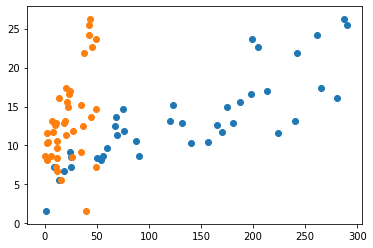

In [43]:
plt.scatter(xtest["TV"],ytest)
plt.scatter(xtest["Radio"],ytest)

### Step_7: Calculating Error Terms

In [44]:
from sklearn.metrics import mean_squared_error, r2_score

In [45]:
mean_squared_error(ytest, prediction)

4.391429763581877

In [46]:
r2_score(ytest,prediction)

0.860454166318657

In [47]:
### training score
tr_pred = lr.predict(xtrain)

In [48]:
mean_squared_error(ytrain,tr_pred)

2.4099491352561975

In [49]:
r2_score(ytrain,tr_pred)

0.906590009997456